In [1]:
import re
import string
import numpy as np
import pandas as pd

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
test_df = pd.read_csv('test.csv')

In [4]:
full_dataset = pd.concat([train_df, test_df], sort=False)

In [5]:
from nltk.tokenize.casual import casual_tokenize

In [6]:
from sklearn.feature_extraction import text
sk_learn_stopwords = text.ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
nltk__stopwords = stopwords.words('english')
stop_words = sk_learn_stopwords.intersection(nltk__stopwords)

In [7]:
def clean_row(row):
    """Cleans the row """
    temp_tweet = row['tweet']
    temp_tweet = re.sub(r'https?:\/\/.*\/[a-zA-Z0-9]*', '', temp_tweet)
    temp_tweet = re.sub(r'&amp;quot;|&amp;amp', '', temp_tweet)
    temp_tweet = re.sub(r'@[\w]*', '', temp_tweet)
    #temp_tweet = re.sub(r'#[a-zA-Z0-9]*', '', temp_tweet)
    return temp_tweet

In [8]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [9]:
def tweet_casual_tokenize(text):
    return casual_tokenize(text, reduce_len=True, strip_handles=True)

In [10]:
def remove_stopwords(words):
    return [word for word in words if word not in stop_words]

In [11]:
full_dataset['tweet'] = full_dataset['tweet'].str.lower()
full_dataset['tweet'] = full_dataset.apply(clean_row, axis=1)

In [12]:
full_dataset['cleaned_tweet'] = full_dataset['tweet'].apply(
    tweet_casual_tokenize)
full_dataset['cleaned_tweet'] = full_dataset['cleaned_tweet'].apply(
    remove_stopwords)

In [13]:
full_dataset['tweet_length'] = full_dataset['tweet'].str.len()

full_dataset['cleaned_tweet'] = full_dataset['cleaned_tweet'].apply(
    lambda x: ' '.join(x))
full_dataset['cleaned_tweet'] = full_dataset['cleaned_tweet'].apply(
    remove_punctuations)
full_dataset['word_count'] = full_dataset['cleaned_tweet'].str.len()

In [14]:
full_dataset.loc[0]['tweet'].values

array(['#fingerprint #pregnancy test  #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone',
       "i hate the new #iphone upgrade. won't let me download apps. #ugh #apple sucks"],
      dtype=object)

In [15]:
full_dataset.loc[0]['cleaned_tweet'].values

array(['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone',
       'hate new iphone upgrade  wont let download apps  ugh apple sucks'],
      dtype=object)

In [16]:
from textblob import TextBlob

In [17]:
full_dataset['polarity'] = full_dataset['tweet'].apply(
    lambda x: TextBlob(x).sentiment.polarity)

In [18]:
full_dataset.head()

,id,label,tweet,cleaned_tweet,tweet_length,word_count,polarity
0,1,0.0,#fingerprint #pregnancy test #android #apps #...,fingerprint pregnancy test android apps beauti...,107,95,0.675000
1,2,0.0,finally a transparant silicon case ^^ thanks t...,finally transparant silicon case thanks uncl...,97,82,0.233333
2,3,0.0,we love this! would you go? #talk #makememorie...,love would go talk makememories unplug relax...,101,78,0.625000
3,4,0.0,i'm wired i know i'm george i was made that wa...,im wired know im george made way iphone cute ...,81,59,0.375000
4,5,1.0,what amazing service! apple won't even talk to...,amazing service apple wont even talk question...,124,79,-0.125000


In [19]:
train = full_dataset[full_dataset['label'].notnull()]

In [20]:
train.head()

,id,label,tweet,cleaned_tweet,tweet_length,word_count,polarity
0,1,0.0,#fingerprint #pregnancy test #android #apps #...,fingerprint pregnancy test android apps beauti...,107,95,0.675000
1,2,0.0,finally a transparant silicon case ^^ thanks t...,finally transparant silicon case thanks uncl...,97,82,0.233333
2,3,0.0,we love this! would you go? #talk #makememorie...,love would go talk makememories unplug relax...,101,78,0.625000
3,4,0.0,i'm wired i know i'm george i was made that wa...,im wired know im george made way iphone cute ...,81,59,0.375000
4,5,1.0,what amazing service! apple won't even talk to...,amazing service apple wont even talk question...,124,79,-0.125000


In [21]:
import seaborn as sns
import numpy as np
sns.distplot(train[train['label'] == 1]['polarity'], bins=15)

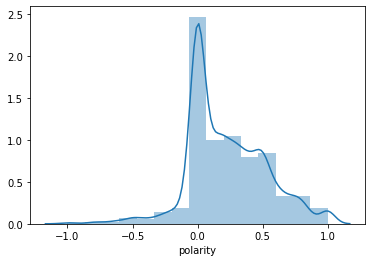

In [22]:
sns.distplot(train[train['label'] == 0]['polarity'], bins=15)

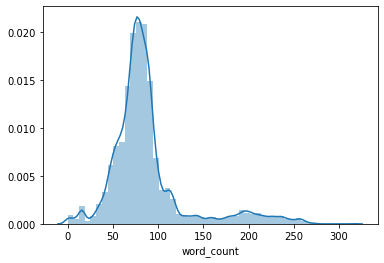

In [23]:
sns.distplot(train[train['label'] == 0]['word_count'])

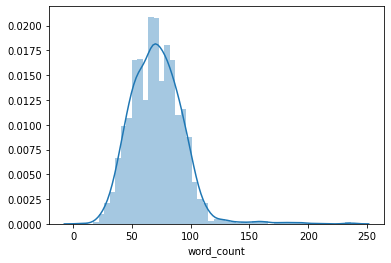

In [24]:
sns.distplot(train[train['label'] == 1]['word_count'])